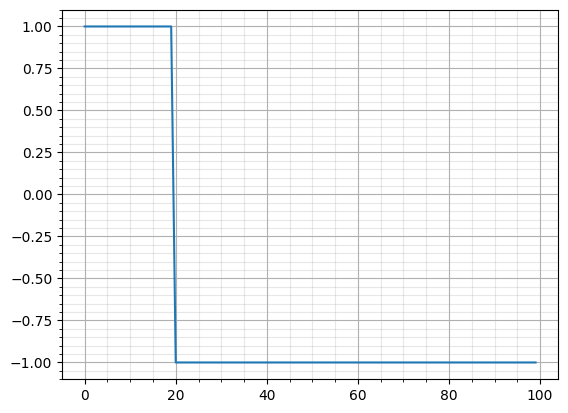

In [1]:
import matplotlib.pyplot as plt
from math import *

SAMPLE_RATE = 48000

class Pulse:
    sample_index: int
    freq: float
    sample_rate: int
    duty: float

    def __init__(self, freq: float, sample_rate: int, duty: float):
        assert(0.0 <= duty <= 1.0)
        self.freq = freq
        self.sample_rate = sample_rate
        self.sample_index = 0
        self.duty = duty

    def __iter__(self):
        return self

    def __next__(self):
        t = float(self.sample_index)
        sr = float(self.sample_rate)
        period = sr / self.freq
        point = t / period

        # FIXME: no wrapping
        self.sample_index += 1

        if (t % period) / period < self.duty:
            return 1.0
        else:
            return -1.0

# def pulse(freq: float, duty: float):
#     assert(0.0 <= duty <= 1.0)

#     period = sample_rate / freq

#     return [1.0 for _ in range(int(period * duty))] + [0.0 for _ in range(int(period * (1.0 - duty)))]

pulse = Pulse(480.0, SAMPLE_RATE, 0.2)

plt.plot([next(pulse) for _ in range(100)])

# plt.plot([sin(pi * 2.0 * (x / (48e3 / 1000.0))) for x in range(100)])

# 
plt.ylim(-1.1, 1.1)

plt.minorticks_on()
plt.grid()
plt.grid(which='minor', alpha=0.3)
